<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/EDO_Aplicadas-IMCA/blob/main/Multipasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
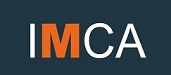


---


# CLASE: Metodo Predictor - Corrector con Adams de cuarto Orden

# Metodo Adams de Cuarto orden para EDO

Sea el problema de valor inicial(PVI):

$$   \dot{y}=f(t,y) $$
con
$y(a)=\alpha$  y  $a<t<b$


Donde $f$ una funcion Lipschitziana en la variable $y$.

El método consiste primero hallar las aproximaciones $w_{1}$,$w_{2}$,$w_{3}$, con el metodo de Runke Kutta. Asi se tiene la primera parte de la iteracion:

$$w_{i}=w_{i-1}+\frac{1}{6}(K_{1}+2K_{2}+2K_{3}+K_{4}) $$

Para $i=1,2,3$

Donde:
* $K_{1}=hf(t_{i-1},w_{i-1})$
* $K_{2}=hf(t_{i-1}+ \frac{1}{2}h,w_{i-1}+\frac{1}{2}K_{1})$
* $K_{3}=hf(t_{i-1}+\frac{1}{2}h,w_{i-1}+\frac{1}{2}K_{2})$
* $K_{4}=hf(t_{i-1}+h,w_{i-1}+K_{3})$

La segunda parte consiste en hallar los siguientes puntos con los puntos calculados

In [ ]:
#RUNGE KUTTA FELBERG - EDO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#definicion de la funcion f
def f(t,y):
  return y-t**2+1
#Metodo de RK
def PC_ADAM4(a,b,y0,f,N):
  """
  Implementacion metodo de PRED-CORRREC ADAM 4ORDEN
  a--Inicio Intervalo
  b--Fin de Intervalo
  y0--Aproximacion Inicial
  f-funcion
  N--Pasos
  Salida
  w--aproximacion final
  """
  #paso 1
  h=(b-a)/N
  t=a
  w=y0
  print(f'Tiempo t={t}, solucion aproximada={w},paso={h}\n')
  Y,T,=[],[]
  T+=[a]
  Y+=[w]
  #paso 2
  for i in range(1,4):
    #paso 3
    k1=h*f(t,w)
    k2=h*f(t+h/2,w+k1/2)
    k3=h*f(t+h/2,w+k2/2)
    k4=h*f(t+h,w+k3)
    #paso 4
    w=w+(k1+2*k2+2*k3+k4)/6
    Y+=[w]
    t=a+i*h
    T+=[t]
    #paso 5
    print(f'Tiempo t={t}, solucion aproximada={w},paso={h}\n')
  w0=Y[0]
  w1=Y[1]
  w2=Y[2]
  w3=Y[3]
  t0=T[0]
  t1=T[1]
  t2=T[2]
  t3=T[3]
  #paso 6
  for i in range(4,N+1):
    #paso 7
    t=a+i*h
    w=w3+h*(55*f(t3,w3)-59*f(t2,w2)+37*f(t1,w1)-9*f(t0,w0))/24
    w=w3+h*(9*f(t,w)+19*f(t3,w3)-5*f(t2,w2)+f(t1,w1))/24
    #paso 8
    print(f'Tiempo t={t}, solucion aproximada={w},paso={h}\n')
    Y+=[w]
    T+=[t]
    #paso 9: actualizando valores para la siguiente iteracion
    w0=w1
    w1=w2
    w2=w3
    t0=t1
    t1=t2
    t2=t3
    #paso 10
    w3=w
    t3=t
  return T,Y

In [ ]:
# Definicion de la funcion solucion Y
def ff(T):
  y_real=[]
  for t in T:
    y_real+=[(t+1)**2-0.5*np.exp(t)]
  return y_real

Tiempo t=0, solucion aproximada=0.5,paso=0.2

Tiempo t=0.2, solucion aproximada=0.8292933333333334,paso=0.2

Tiempo t=0.4, solucion aproximada=1.2140762106666667,paso=0.2

Tiempo t=0.6000000000000001, solucion aproximada=1.6489220170416001,paso=0.2

Tiempo t=0.8, solucion aproximada=2.1272056324187787,paso=0.2

Tiempo t=1.0, solucion aproximada=2.640828595969636,paso=0.2

Tiempo t=1.2000000000000002, solucion aproximada=3.1799026354038826,paso=0.2

Tiempo t=1.4000000000000001, solucion aproximada=3.7323504816223303,paso=0.2

Tiempo t=1.6, solucion aproximada=4.28342082355015,paso=0.2

Tiempo t=1.8, solucion aproximada=4.815096355330386,paso=0.2

Tiempo t=2.0, solucion aproximada=5.3053706715158455,paso=0.2

      t       w_i       y_i
0   0.0  0.500000  0.500000
1   0.2  0.829293  0.829299
2   0.4  1.214076  1.214088
3   0.6  1.648922  1.648941
4   0.8  2.127206  2.127230
5   1.0  2.640829  2.640859
6   1.2  3.179903  3.179942
7   1.4  3.732350  3.732400
8   1.6  4.283421  4.283484
9  

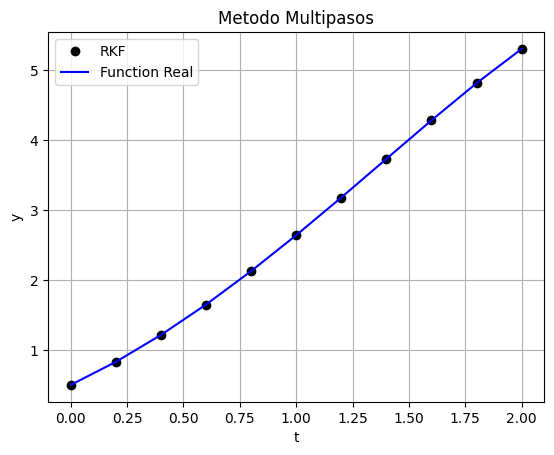

In [ ]:
#RK-4 para h=0.5
tr,yr=PC_ADAM4(0,2,0.5,f,10)
#calculo de la solucion real
yv=ff(tr)
#conversion de la listas a un dataframe
datos={'t':tr,'w_i':yr,'y_i':yv}
df=pd.DataFrame(datos)
print(df)

#ploteo de los resultados
plt.plot(tr,yr,'ok')
plt.plot(tr,yv,'b')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Metodo Multipasos')
plt.legend(['RKF','Function Real'])
plt.show()